In [54]:
## STEP 1: IMPORTING LIBRARIES

In [55]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [56]:
##STEP 2: LOADING THE DATASET

In [57]:
poker_df = pd.read_csv('poker_hand_train_true.csv')
poker_df 

,1,10,1.1,11,1.2,13,1.3,12,1.4,1.5,9
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8
...,...,...,...,...,...,...,...,...,...,...,...
25004,3,9,2,6,4,11,4,12,2,4,0
25005,4,1,4,10,3,13,3,4,1,10,1
25006,2,1,2,10,4,4,4,1,4,13,1
25007,2,12,4,3,1,10,1,12,4,9,1


In [58]:
##STEP 3: ANALYSING AND PRE-PROCESSING THE DATA

In [59]:
##STEP 4: CHANGING NAMES OF COLUMN ACCORDING TO THE REFERENCES PROVIDED FROM WHERE THE DATASET IS OBTAINED

In [60]:
poker_df.columns = ['first_suit', 'first_rank', 'second_suit', 'second_rank', 'third_suit', 'third_rank',
'fourth_suit', 'fourth_rank', 'fifth_suit', 'fifth_rank', 'hand']

labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush', 'full_house',
'four_of_a_kind', 'straight_flush', 'royal_flush']

poker_df

,first_suit,first_rank,second_suit,second_rank,third_suit,third_rank,fourth_suit,fourth_rank,fifth_suit,fifth_rank,hand
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8
...,...,...,...,...,...,...,...,...,...,...,...
25004,3,9,2,6,4,11,4,12,2,4,0
25005,4,1,4,10,3,13,3,4,1,10,1
25006,2,1,2,10,4,4,4,1,4,13,1
25007,2,12,4,3,1,10,1,12,4,9,1


In [61]:
### 4) SEPERATING THE DATASET INTO FEATURES (X) AND TARGET VALUES (y)
X = poker_df.iloc[:, 0:9]
y = poker_df.hand

In [62]:
##STEP 5: VISUALIZING WHETHER CLASS BALANCE IS PRESENT IN OUR DATASET OR NOT

In [63]:
!pip install yellowbrick


Defaulting to user installation because normal site-packages is not writeable


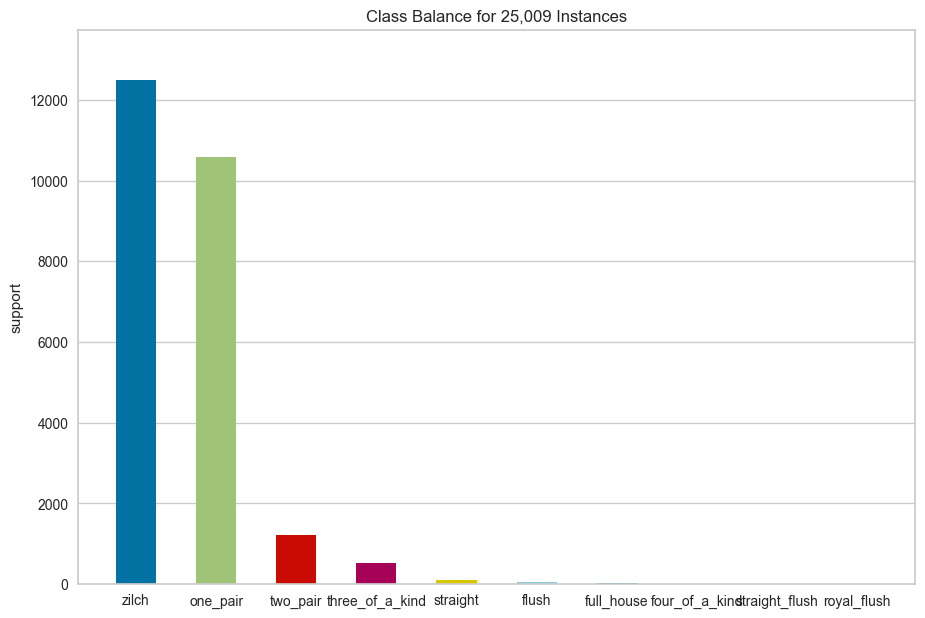

<Axes: title={'center': 'Class Balance for 25,009 Instances'}, ylabel='support'>

In [64]:
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassPredictionError

balance = ClassBalance(size=(1080,720), labels=labels)

balance.fit(y)

balance.show()

In [65]:
###THUS THERE IS CLASS IMBALANCE PRESENT IN OUR DATASET, ANS WE MUST REMOVE IT

In [66]:
##STEP 6: UP-SAMPLING FROM MINORITY CLASSES

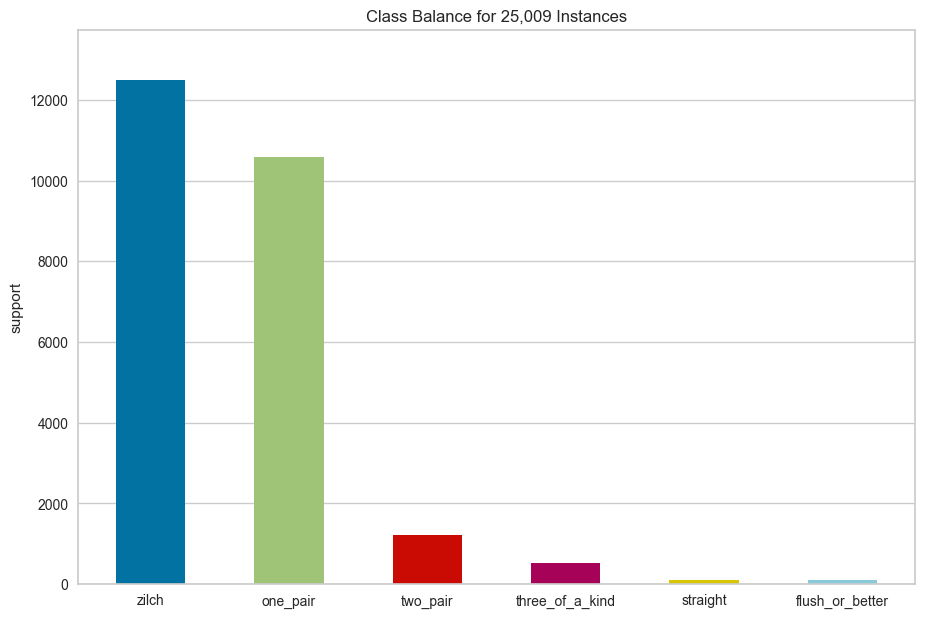

<Axes: title={'center': 'Class Balance for 25,009 Instances'}, ylabel='support'>

In [67]:
poker_df.loc[poker_df['hand']>=5, 'hand'] = 5

y = poker_df.hand

labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush_or_better']

balance = ClassBalance(size=(1080,720), labels=labels)

balance.fit(y)

balance.show()

In [68]:
##STEP 7: TRAINING THE RANDOM FORESTS CLASSIFIER

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining the MLPClassifier with increased iterations and scaling
CLF = MLPClassifier(solver='adam', alpha=0.1, hidden_layer_sizes=(50, 100, 50), 
                    learning_rate='adaptive', activation='tanh', max_iter=1000)




# Fitting the model
CLF.fit(X_train, y_train)


In [31]:
##STEP 8: EVALUATING THE MODEL


In [32]:
#### A) CLASSIFICATION ACCURACY

In [48]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score

y_pred_test = CLF.predict(X_test)
y_pred_train = CLF.predict(X_train)

print ("Accuracy of the Model on Train Data is : {}".format(accuracy_score(y_train, y_pred_train)))
print ("Accuracy of the Model on Test Data is : {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy of the Model on Train Data is : 0.9460972488803583
Accuracy of the Model on Test Data is : 0.6352658936425429


In [51]:
print("Unique classes in training set:", np.unique(y_train))
print("Unique classes in test set:", np.unique(y_test))


NameError: name 'np' is not defined

In [50]:
from yellowbrick.classifier import ROCAUC

# Assuming 'labels' contains the unique class labels, for example [0, 1, 2, 3, 4]
labels = [0, 1, 2, 3, 4]  # replace with your actual labels

# Initialize the ROCAUC visualizer with your classifier and class labels
rocauc = ROCAUC(CLF, size=(1080, 720), classes=labels)

# Score the model
rocauc.score(X_test, y_test)

# Show the ROC-AUC plot
rocauc.show()

ModelError: could not decode [0 1 2 3 4 5] y values to [0 1 2 3 4] labels

<Figure size 1080x720 with 0 Axes>